# K-Nearest Neighbors (KNN)

A simple yet powerful supervised machine learning algorithm used for classification and regression tasks. The rationale here is that a data instance's class is likely to match that of others nearby. KNN examines the 'k' closest data points to each instance in the relevant feature space, selecting the class with the highest frequency. For regression, KNN predicts the value of a data point by averaging the values of its 'k' nearest neighbors. The algorithm is non-parametric, meaning it makes no assumptions about the underlying data distribution, which makes it versatile but also computationally intensive for large datasets.

An overview of the process: the user selects the number of nearby instances ('k') to examine. The distance between that instance and nearby points is calculated using a specified metric (for example, Euclidean distance). The 'k' closest data points are identified, and for classification, the majority class among these neighbors is assigned to the data point. For regression, the average of the 'k' nearest neighbors' values is taken as the prediction.

***Setup***

Import essential libraries for data manipulation, visualization, and model implementation.

In [90]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


***Data Generation***

Define a function called "generate_data" which creates a toy two-class dataset containing 300 two-feature examples. 

Output:

    X: A 2D array of shape (n_samples, n_features) representing the feature values.

    y: A 1D array of shape (n_samples,) containing the class labels.

In [91]:
def generate_data():
    X, y = make_classification(n_samples=300, n_features=2, n_classes=2, n_informative=2, 
                                n_redundant=0, random_state=42)
    return X, y

***Data Visualization***

Display a scatterplot of generated data. 

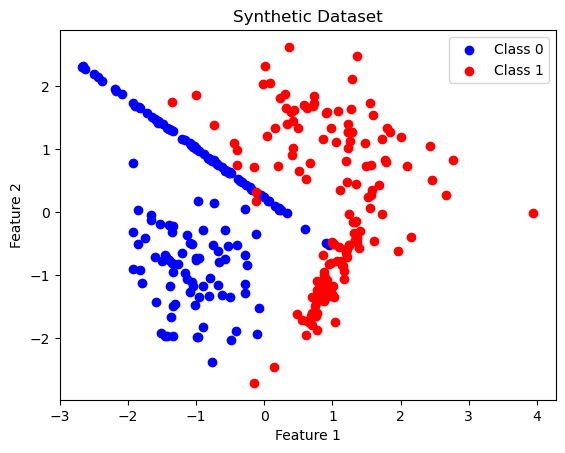

In [92]:
def plot_data(X, y):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', c='blue')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', c='red')
    plt.title("Synthetic Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

X, y = generate_data()
plot_data(X, y)

***KNN Implementation***

Define the KNN class to predict labels based on the majority vote of k-nearest neighbors.

A tie occurs when there is an equal number of neighbors from different classes among the k nearest neighbors. For example, if k=4 and two neighbors belong to Class 0 while the other two belong to Class 1, the algorithm cannot decide the majority class.

A variety of methods exist to handle this possibility. Common approaches include: 

1. Arbitrary Choice 

The algorithm may simply pick one of the tied classes (e.g., the first class it encounters).
This is often the default behavior if no tie-breaking mechanism is implemented.

2. Distance Weighting 

Closer neighbors are weighted more highly. 

3. Odd 'k'

Choose an odd value for k to minimize the chances of a tie in binary classification. 
For example, k=3 ensures a majority decision if there are only two classes.

4. Secondary Criterion

Break ties using a secondary criterion, for example the overall distance sum of neighbors for each class, or prior probabilities of classes (if available).

In [93]:
class KNearestNeighbors:
    def __init__(self, k=3):
        # Set the value of k, the number of nearest neighbors to consider.
        self.k = k

    def fit(self, X, y):
        # Store training data for distance computation.
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Predict class for each instance in the test set.
        predictions = [self._predict_instance(x) for x in X]
        return np.array(predictions)

    def _predict_instance(self, x):
        # Calculate distance from each example the training points.
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Identify the k-nearest neighbors.
        k_indices = np.argsort(distances)[:self.k]
        # Retrieve the labels of the nearest neighbors.
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common label, which determines the class of the test instance.
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

### Split and prepare data
Split the dataset into training and testing sets to evaluate model performance.
Instantiate the KNN model with a specific k value and train it using the training data.


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training KNN
k = 5
knn = KNearestNeighbors(k=k)
knn.fit(X_train, y_train)

In [98]:
# Predicting on Test Data

# Rationale: Use the trained model to make predictions on the test set.
y_pred = knn.predict(X_test)

In [99]:
# Evaluating the Model
# Rationale: Evaluate the model's performance using common metrics such as accuracy and confusion matrix.
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556
Confusion Matrix:
 [[46  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.93      0.95        43

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.96        90
weighted avg       0.96      0.96      0.96        90



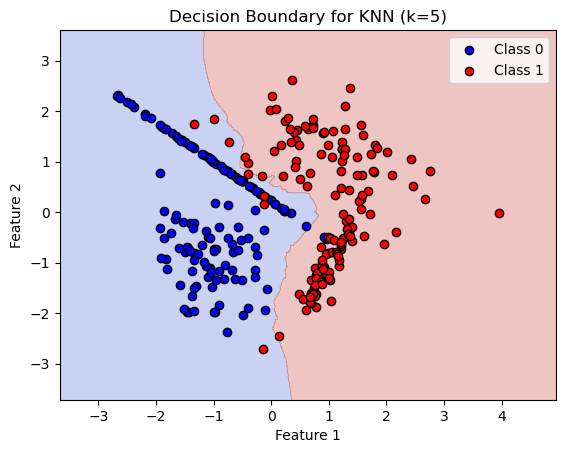

In [100]:
# Visualizing Predictions

# Rationale: Plot the decision boundary to understand how the model classifies the data.
def plot_decision_boundary(X, y, model, resolution=0.01):
    # Set min and max values for the grid.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), 
                         np.arange(y_min, y_max, resolution))
    
    # Predict labels for each point in the grid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary.
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', c='blue', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', c='red', edgecolor='k')
    plt.title("Decision Boundary for KNN (k={})".format(model.k))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, knn)

![KNN](/images/KNN_output.png)